## Scraping NBA stats data using BeautifulSoup

In [3]:

import pandas as pd
from bs4 import BeautifulSoup
from urllib import request

website = request.urlopen("https://www.basketball-reference.com/leagues/NBA_2020_per_game.html").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'class': 'sortable', 'id': 'per_game_stats'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

final_data = []
for tr in table_rows:
	td = tr.find_all('td')
	row = [tr.text for tr in td]
	final_data.append(row)

print(table_headers)
df = pd.DataFrame(final_data, columns=table_headers[1:])
df.to_csv('nba_stats.csv')

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [20]:
website = request.urlopen("https://www.basketball-reference.com/leagues/NBA_2020_advanced.html").read()
soup = BeautifulSoup(website, 'lxml')

table = soup.find('table', attrs={'class': 'sortable', 'id': 'advanced_stats'})

table_headers = [header.text for header in table.find('thead').find_all('th')]
table_rows = table.find_all('tr')

final_data = []
for tr in table_rows:
	td = tr.find_all('td')
	row = [tr.text for tr in td]
	final_data.append(row)

print(table_headers)
df = pd.DataFrame(final_data, columns=table_headers[1:])
df.to_csv('nba_stats_advanced.csv')

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '\xa0', 'OWS', 'DWS', 'WS', 'WS/48', '\xa0', 'OBPM', 'DBPM', 'BPM', 'VORP']


In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df = pd.read_csv('/Users/macuser/nba_stats.csv')

In [39]:
df.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
2,2,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
3,3,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
4,4,Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0


In [40]:
df.shape

(678, 30)

In [41]:
df.columns

Index(['Unnamed: 0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [50]:
df = df.rename(columns={'Unnamed: 0' : 'Ranking'})

In [48]:
df.drop('Rk',axis=1,inplace=True)

In [51]:
df.head()

,Ranking,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
2,2,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
3,3,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
4,4,Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0


In [52]:
# row 0 is filled with NaN values, so we remove it
df.drop(df.index[0], inplace=True)

In [53]:
df

,Ranking,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,1,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
2,2,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
3,3,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
4,4,Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
5,5,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,1.0,12.6,2.1,5.7,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,673,Trae Young,PG,21.0,ATL,60.0,60.0,35.3,9.1,20.8,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
674,674,Cody Zeller,C,27.0,CHO,58.0,39.0,23.1,4.3,8.3,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
675,675,Tyler Zeller,C,30.0,SAS,2.0,0.0,2.0,0.5,2.0,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
676,676,Ante Žižić,C,23.0,CLE,22.0,0.0,10.0,1.9,3.3,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [54]:
# Find unique values
df.nunique(axis=0)

Ranking    677
Player     529
Pos         14
Age         22
Tm          31
G           74
GS          72
MP         276
FG          95
FGA        175
FG%        273
3P          41
3PA         91
3P%        221
2P          79
2PA        119
2P%        253
eFG%       259
FT          62
FTA         73
FT%        271
ORB         40
DRB         86
TRB        103
AST         72
STL         22
BLK         25
TOV         43
PF          41
PTS        207
dtype: int64

In [55]:
# Check mean, median, mode, standard-deviation etc for each variable
df.describe().apply(lambda s: s.apply(lambda x : format(x, 'f')))

,Ranking,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,677.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,649.000000,651.000000,651.000000,...,618.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,339.000000,25.763441,38.216590,17.537634,19.179724,3.097849,6.861444,0.442891,0.938863,2.695392,...,0.743769,0.817051,2.748694,3.563287,1.843932,0.617665,0.398157,1.101075,1.740092,8.461290
std,195.577350,4.024840,22.944430,23.022124,9.060972,2.222285,4.667673,0.111526,0.849802,2.191573,...,0.150642,0.727948,1.841340,2.429509,1.698073,0.406082,0.409010,0.807703,0.819891,6.197278
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,23.000000,15.500000,0.000000,12.000000,1.400000,3.400000,0.399000,0.300000,1.000000,...,0.667000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.600000,1.100000,3.800000
50%,339.000000,25.000000,41.000000,4.000000,18.500000,2.500000,5.600000,0.439000,0.800000,2.300000,...,0.770500,0.600000,2.400000,3.100000,1.300000,0.600000,0.300000,0.900000,1.700000,6.800000
75%,508.000000,28.000000,59.000000,29.500000,26.700000,4.300000,9.400000,0.486000,1.400000,3.800000,...,0.836000,1.100000,3.650000,4.650000,2.200000,0.900000,0.500000,1.400000,2.300000,11.650000
max,677.000000,43.000000,74.000000,73.000000,37.500000,10.900000,22.900000,1.000000,4.400000,12.400000,...,1.000000,4.600000,11.400000,15.800000,10.200000,2.100000,2.900000,4.800000,5.000000,34.300000


In [21]:
df_advanced = pd.read_csv('/Users/macuser/nba_stats_advanced.csv')

In [22]:
df_advanced.head()

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,NaN,3.8,2.7,6.5,0.185,NaN,1.9,1.1,2.9,2.1
2,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,NaN,4.6,3.9,8.5,0.168,NaN,1.4,2.0,3.4,3.3
3,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,NaN,3.0,1.4,4.5,0.122,NaN,1.8,-0.5,1.4,1.5
4,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,0.0,0.0,0.0,-0.003,NaN,-6.1,-3.5,-9.6,0.0


In [23]:
df_advanced

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,NaN,3.8,2.7,6.5,0.185,NaN,1.9,1.1,2.9,2.1
2,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,NaN,4.6,3.9,8.5,0.168,NaN,1.4,2.0,3.4,3.3
3,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,NaN,3.0,1.4,4.5,0.122,NaN,1.8,-0.5,1.4,1.5
4,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,0.0,0.0,0.0,-0.003,NaN,-6.1,-3.5,-9.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,673,Trae Young,PG,21.0,ATL,60.0,2120.0,23.9,0.595,0.455,...,NaN,5.3,0.6,5.9,0.133,NaN,6.2,-2.3,3.9,3.1
674,674,Cody Zeller,C,27.0,CHO,58.0,1341.0,18.8,0.576,0.157,...,NaN,2.3,1.3,3.6,0.129,NaN,0.2,-0.8,-0.6,0.5
675,675,Tyler Zeller,C,30.0,SAS,2.0,4.0,22.4,0.250,0.000,...,NaN,0.0,0.0,0.0,-0.075,NaN,-0.3,-22.1,-22.4,0.0
676,676,Ante Žižić,C,23.0,CLE,22.0,221.0,16.4,0.597,0.000,...,NaN,0.3,0.2,0.5,0.106,NaN,-1.7,-1.5,-3.2,-0.1


In [26]:
df_advanced.drop(df_advanced.index[0],inplace=True)

In [27]:
df_advanced

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP
1,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,NaN,3.8,2.7,6.5,0.185,NaN,1.9,1.1,2.9,2.1
2,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,NaN,4.6,3.9,8.5,0.168,NaN,1.4,2.0,3.4,3.3
3,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,NaN,3.0,1.4,4.5,0.122,NaN,1.8,-0.5,1.4,1.5
4,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,0.0,0.0,0.0,-0.003,NaN,-6.1,-3.5,-9.6,0.0
5,5,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,...,NaN,-0.7,0.4,-0.2,-0.020,NaN,-3.2,-1.4,-4.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,673,Trae Young,PG,21.0,ATL,60.0,2120.0,23.9,0.595,0.455,...,NaN,5.3,0.6,5.9,0.133,NaN,6.2,-2.3,3.9,3.1
674,674,Cody Zeller,C,27.0,CHO,58.0,1341.0,18.8,0.576,0.157,...,NaN,2.3,1.3,3.6,0.129,NaN,0.2,-0.8,-0.6,0.5
675,675,Tyler Zeller,C,30.0,SAS,2.0,4.0,22.4,0.250,0.000,...,NaN,0.0,0.0,0.0,-0.075,NaN,-0.3,-22.1,-22.4,0.0
676,676,Ante Žižić,C,23.0,CLE,22.0,221.0,16.4,0.597,0.000,...,NaN,0.3,0.2,0.5,0.106,NaN,-1.7,-1.5,-3.2,-0.1


In [56]:
df_advanced = df_advanced.rename(columns={'Unnamed: 0':'Rk'})

In [57]:
df_advanced

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,,OWS,DWS,WS,WS/48,.1,OBPM,DBPM,BPM,VORP
1,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,NaN,3.8,2.7,6.5,0.185,NaN,1.9,1.1,2.9,2.1
2,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,NaN,4.6,3.9,8.5,0.168,NaN,1.4,2.0,3.4,3.3
3,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,NaN,3.0,1.4,4.5,0.122,NaN,1.8,-0.5,1.4,1.5
4,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,0.0,0.0,0.0,-0.003,NaN,-6.1,-3.5,-9.6,0.0
5,5,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,...,NaN,-0.7,0.4,-0.2,-0.020,NaN,-3.2,-1.4,-4.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,673,Trae Young,PG,21.0,ATL,60.0,2120.0,23.9,0.595,0.455,...,NaN,5.3,0.6,5.9,0.133,NaN,6.2,-2.3,3.9,3.1
674,674,Cody Zeller,C,27.0,CHO,58.0,1341.0,18.8,0.576,0.157,...,NaN,2.3,1.3,3.6,0.129,NaN,0.2,-0.8,-0.6,0.5
675,675,Tyler Zeller,C,30.0,SAS,2.0,4.0,22.4,0.250,0.000,...,NaN,0.0,0.0,0.0,-0.075,NaN,-0.3,-22.1,-22.4,0.0
676,676,Ante Žižić,C,23.0,CLE,22.0,221.0,16.4,0.597,0.000,...,NaN,0.3,0.2,0.5,0.106,NaN,-1.7,-1.5,-3.2,-0.1


In [74]:
df_shooting_stats = pd.read_csv('/Users/macuser/nba_shooting_stats.csv')

In [75]:
df_shooting_stats

,Rk,Player,Pos,Age,Tm,G,MP,FG%,Dist.,2P,...,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1
0,1,Steven Adams,C,26,OKC,63,1680,0.592,4.4,0.994,...,1.000,0.333,0.670,1.000,0.176,78,0.333,0.000,1,1
1,2,Bam Adebayo,PF,22,MIA,72,2417,0.557,5.8,0.982,...,0.227,0.143,0.715,0.500,0.219,157,0.571,0.125,1,0
2,3,LaMarcus Aldridge,C,34,SAS,53,1754,0.493,13.7,0.802,...,0.433,0.389,0.567,0.951,0.044,31,0.185,0.379,1,0
3,4,Kyle Alexander,C,23,MIA,2,13,0.500,1.5,1.000,...,NaN,NaN,0.000,NaN,0.000,0,NaN,NaN,0,0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,591,0.368,15.9,0.500,...,0.375,0.346,0.192,0.913,0.008,2,0.188,0.360,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,Trae Young\youngtr01,PG,21,ATL,60,2120,0.437,16.8,0.545,...,0.413,0.361,0.161,0.298,0.000,0,0.033,0.579,1,1
647,526,Cody Zeller\zelleco01,C,27,CHO,58,1341,0.524,6.6,0.843,...,1.000,0.240,0.704,0.944,0.140,63,0.053,0.500,0,0
648,527,Tyler Zeller\zellety01,C,30,SAS,2,4,0.250,3.0,1.000,...,NaN,NaN,1.000,NaN,0.000,0,NaN,NaN,0,0
649,528,Ante Žižić\zizican01,C,23,CLE,22,221,0.569,4.1,1.000,...,0.000,NaN,0.756,NaN,0.042,1,NaN,NaN,0,0


In [76]:
df_shooting_stats = df_shooting_stats.rename(columns={'Player':'Player\handle'})

In [77]:
df_shooting_stats

,Rk,Player\handle,Pos,Age,Tm,G,MP,FG%,Dist.,2P,...,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1
0,1,Steven Adams,C,26,OKC,63,1680,0.592,4.4,0.994,...,1.000,0.333,0.670,1.000,0.176,78,0.333,0.000,1,1
1,2,Bam Adebayo,PF,22,MIA,72,2417,0.557,5.8,0.982,...,0.227,0.143,0.715,0.500,0.219,157,0.571,0.125,1,0
2,3,LaMarcus Aldridge,C,34,SAS,53,1754,0.493,13.7,0.802,...,0.433,0.389,0.567,0.951,0.044,31,0.185,0.379,1,0
3,4,Kyle Alexander,C,23,MIA,2,13,0.500,1.5,1.000,...,NaN,NaN,0.000,NaN,0.000,0,NaN,NaN,0,0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,591,0.368,15.9,0.500,...,0.375,0.346,0.192,0.913,0.008,2,0.188,0.360,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,Trae Young\youngtr01,PG,21,ATL,60,2120,0.437,16.8,0.545,...,0.413,0.361,0.161,0.298,0.000,0,0.033,0.579,1,1
647,526,Cody Zeller\zelleco01,C,27,CHO,58,1341,0.524,6.6,0.843,...,1.000,0.240,0.704,0.944,0.140,63,0.053,0.500,0,0
648,527,Tyler Zeller\zellety01,C,30,SAS,2,4,0.250,3.0,1.000,...,NaN,NaN,1.000,NaN,0.000,0,NaN,NaN,0,0
649,528,Ante Žižić\zizican01,C,23,CLE,22,221,0.569,4.1,1.000,...,0.000,NaN,0.756,NaN,0.042,1,NaN,NaN,0,0


In [78]:
df_merged_left=pd.merge(left=df_advanced,right=df_shooting_stats, how='left', left_on='Player', right_on='Player\handle')

In [79]:
df_merged_left

,Rk_x,Player,Pos_x,Age_x,Tm_x,G_x,MP_x,PER,TS%,3PAr,...,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1
0,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,1.000,0.333,0.670,1.000,0.176,78.0,0.333,0.000,1.0,1.0
1,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,0.227,0.143,0.715,0.500,0.219,157.0,0.571,0.125,1.0,0.0
2,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,0.433,0.389,0.567,0.951,0.044,31.0,0.185,0.379,1.0,0.0
3,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,NaN,0.000,NaN,0.000,0.0,NaN,NaN,0.0,0.0
4,5,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,...,0.375,0.346,0.192,0.913,0.008,2.0,0.188,0.360,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,673,Trae Young,PG,21.0,ATL,60.0,2120.0,23.9,0.595,0.455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,674,Cody Zeller,C,27.0,CHO,58.0,1341.0,18.8,0.576,0.157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,675,Tyler Zeller,C,30.0,SAS,2.0,4.0,22.4,0.250,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,676,Ante Žižić,C,23.0,CLE,22.0,221.0,16.4,0.597,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
df_merged_left.columns

Index(['Rk_x', 'Player', 'Pos_x', 'Age_x', 'Tm_x', 'G_x', 'MP_x', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' .1', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'Rk_y', 'Player\handle', 'Pos_y', 'Age_y', 'Tm_y', 'G_y',
       'MP_y', 'FG%', 'Dist.', '2P', '0-3', ' 3-10', ' 10-16', '16-3P', '3P',
       '2P.1', '0-3.1', ' 3-10.1', ' 10-16.1', '16-3P.1', '3P.1', '2P.2',
       '3P.2', '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1'],
      dtype='object')

In [81]:
df_merged_left.drop('Player\handle',axis=1,inplace=True)

In [82]:
df_merged_left.columns

Index(['Rk_x', 'Player', 'Pos_x', 'Age_x', 'Tm_x', 'G_x', 'MP_x', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' .1', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'Rk_y', 'Pos_y', 'Age_y', 'Tm_y', 'G_y', 'MP_y', 'FG%', 'Dist.',
       '2P', '0-3', ' 3-10', ' 10-16', '16-3P', '3P', '2P.1', '0-3.1',
       ' 3-10.1', ' 10-16.1', '16-3P.1', '3P.1', '2P.2', '3P.2', '%FGA', '#',
       '%3PA', '3P%', 'Att.', '#.1'],
      dtype='object')

In [83]:
df_merged_left.drop(columns={'Rk_y','Pos_y','Age_y','Tm_y','G_y','MP_y'},axis=1,inplace=True)

In [84]:
df_merged_left.columns

Index(['Rk_x', 'Player', 'Pos_x', 'Age_x', 'Tm_x', 'G_x', 'MP_x', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', ' ', 'OWS', 'DWS', 'WS', 'WS/48', ' .1', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG%', 'Dist.', '2P', '0-3', ' 3-10', ' 10-16', '16-3P', '3P',
       '2P.1', '0-3.1', ' 3-10.1', ' 10-16.1', '16-3P.1', '3P.1', '2P.2',
       '3P.2', '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1'],
      dtype='object')

In [85]:
df_merged_left = df_merged_left.rename(columns={'Rk_x':'Rk','Pos_x':'Pos','Age_x':'Age','Tm_x':'Tm',
                                               'G_x':'G','MP_x':'MP'})

In [86]:
df_merged_left

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,16-3P.1,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1
0,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,1.000,0.333,0.670,1.000,0.176,78.0,0.333,0.000,1.0,1.0
1,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,0.227,0.143,0.715,0.500,0.219,157.0,0.571,0.125,1.0,0.0
2,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,0.433,0.389,0.567,0.951,0.044,31.0,0.185,0.379,1.0,0.0
3,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,NaN,0.000,NaN,0.000,0.0,NaN,NaN,0.0,0.0
4,5,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,...,0.375,0.346,0.192,0.913,0.008,2.0,0.188,0.360,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,673,Trae Young,PG,21.0,ATL,60.0,2120.0,23.9,0.595,0.455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,674,Cody Zeller,C,27.0,CHO,58.0,1341.0,18.8,0.576,0.157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,675,Tyler Zeller,C,30.0,SAS,2.0,4.0,22.4,0.250,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,676,Ante Žižić,C,23.0,CLE,22.0,221.0,16.4,0.597,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_merged_left.shape

(677, 51)

In [88]:
df_merged_left['FGA'] = df['FGA'].values

In [89]:
df_merged_left

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,FGA
0,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,0.333,0.670,1.000,0.176,78.0,0.333,0.000,1.0,1.0,7.6
1,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,0.143,0.715,0.500,0.219,157.0,0.571,0.125,1.0,0.0,11.0
2,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,0.389,0.567,0.951,0.044,31.0,0.185,0.379,1.0,0.0,15.0
3,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,0.000,NaN,0.000,0.0,NaN,NaN,0.0,0.0,1.0
4,5,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,...,0.346,0.192,0.913,0.008,2.0,0.188,0.360,4.0,0.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,673,Trae Young,PG,21.0,ATL,60.0,2120.0,23.9,0.595,0.455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8
673,674,Cody Zeller,C,27.0,CHO,58.0,1341.0,18.8,0.576,0.157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3
674,675,Tyler Zeller,C,30.0,SAS,2.0,4.0,22.4,0.250,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
675,676,Ante Žižić,C,23.0,CLE,22.0,221.0,16.4,0.597,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3


In [90]:
# Get total FGA
shot_attempts = df_merged_left.filter(regex='FGA').sum(axis=1)

In [92]:
df_merged_left = df_merged_left[df_merged_left.MP > 12]
df_merged_left = df_merged_left.reset_index(drop=True)

In [93]:
df_merged_left

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,3P.1,2P.2,3P.2,%FGA,#,%3PA,3P%,Att.,#.1,FGA
0,1,Steven Adams,C,26.0,OKC,63.0,1680.0,20.5,0.604,0.006,...,0.333,0.670,1.000,0.176,78.0,0.333,0.000,1.0,1.0,7.6
1,2,Bam Adebayo,PF,22.0,MIA,72.0,2417.0,20.3,0.598,0.018,...,0.143,0.715,0.500,0.219,157.0,0.571,0.125,1.0,0.0,11.0
2,3,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,0.389,0.567,0.951,0.044,31.0,0.185,0.379,1.0,0.0,15.0
3,4,Kyle Alexander,C,23.0,MIA,2.0,13.0,4.7,0.500,0.000,...,NaN,0.000,NaN,0.000,0.0,NaN,NaN,0.0,0.0,1.0
4,5,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,591.0,8.9,0.473,0.500,...,0.346,0.192,0.913,0.008,2.0,0.188,0.360,4.0,0.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,672,Thaddeus Young,PF,31.0,CHI,64.0,1591.0,13.3,0.521,0.369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.4
633,673,Trae Young,PG,21.0,ATL,60.0,2120.0,23.9,0.595,0.455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.8
634,674,Cody Zeller,C,27.0,CHO,58.0,1341.0,18.8,0.576,0.157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.3
635,676,Ante Žižić,C,23.0,CLE,22.0,221.0,16.4,0.597,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3


In [97]:
df_merged_left.dtypes

Rk            int64
Player       object
Pos          object
Age         float64
Tm           object
G           float64
MP          float64
PER         float64
TS%         float64
3PAr        float64
FTr         float64
ORB%        float64
DRB%        float64
TRB%        float64
AST%        float64
STL%        float64
BLK%        float64
TOV%        float64
USG%        float64
            float64
OWS         float64
DWS         float64
WS          float64
WS/48       float64
 .1         float64
OBPM        float64
DBPM        float64
BPM         float64
VORP        float64
FG%         float64
Dist.       float64
2P          float64
0-3          object
 3-10        object
 10-16      float64
16-3P       float64
3P          float64
2P.1         object
0-3.1        object
 3-10.1     float64
 10-16.1    float64
16-3P.1     float64
3P.1        float64
2P.2        float64
3P.2        float64
%FGA        float64
#           float64
%3PA        float64
3P%         float64
Att.        float64


In [108]:
df_merged_left_copy = df_merged_left.copy()

In [112]:
df_merged_left_copy.drop('\xa0',axis=1,inplace=True)

In [114]:
df_merged_left_copy.dtypes

Rk            int64
Player       object
Pos          object
Age         float64
Tm           object
G           float64
MP          float64
PER         float64
TS%         float64
3PAr        float64
FTr         float64
ORB%        float64
DRB%        float64
TRB%        float64
AST%        float64
STL%        float64
BLK%        float64
TOV%        float64
USG%        float64
OWS         float64
DWS         float64
WS          float64
WS/48       float64
 .1         float64
OBPM        float64
DBPM        float64
BPM         float64
VORP        float64
FG%         float64
Dist.       float64
2P          float64
0-3          object
 3-10        object
 10-16      float64
16-3P       float64
3P          float64
2P.1         object
0-3.1        object
 3-10.1     float64
 10-16.1    float64
16-3P.1     float64
3P.1        float64
2P.2        float64
3P.2        float64
%FGA        float64
#           float64
%3PA        float64
3P%         float64
Att.        float64
#.1         float64


In [136]:
df_merged_left_copy.drop(df_merged_left_copy.columns[23], axis=1, inplace=True)

In [137]:
df_merged_left_copy.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%',
       'Dist.', '2P', '0-3', ' 3-10', ' 10-16', '16-3P', '3P', '2P.1', '0-3.1',
       ' 3-10.1', ' 10-16.1', '16-3P.1', '3P.1', '2P.2', '3P.2', '%FGA', '#',
       '%3PA', '3P%', 'Att.', '#.1', 'FGA'],
      dtype='object')

In [142]:
df_merged_left_copy.iloc[[3],[30]] = 1.0
df_merged_left_copy.iloc[[3],[31]] = 0.0
df_merged_left_copy.iloc[[3],[35]] = 0.5
df_merged_left_copy.iloc[[3],[36]] = 0.5

In [144]:
df_merged_left_copy.iloc[[3],[30]] 

,0-3
3,1


In [145]:
df_merged_left_copy.iloc[[3],[31]]

,3-10
3,0


In [146]:
df_merged_left_copy.iloc[[3],[35]]

,2P.1
3,0.5


In [147]:
df_merged_left_copy.iloc[[3],[36]]

,0-3.1
3,0.5


In [153]:
df_merged_left_copy = df_merged_left_copy.fillna(0)

## Scaling Data For Clustering

In [154]:
from sklearn.preprocessing import StandardScaler

data = df_merged_left_copy.iloc[:,5:52]
scaled_data = StandardScaler().fit_transform(data)

In [161]:
data.columns

Index(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG%', 'Dist.', '2P', '0-3', ' 3-10', ' 10-16',
       '16-3P', '3P', '2P.1', '0-3.1', ' 3-10.1', ' 10-16.1', '16-3P.1',
       '3P.1', '2P.2', '3P.2', '%FGA', '#', '%3PA', '3P%', 'Att.', '#.1',
       'FGA'],
      dtype='object')

### Player Clustering

In [158]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the best number of clusters using the silhoutte score
si_scores = [] # array of silhoutte scores
kmax = 12
my_range = range(2, kmax + 1)

for i in my_range:
    k_means = KMeans(n_clusters = i).fit(scaled_data)
    labels = k_means.labels_
    si_scores.append(silhouette_score(scaled_data, labels, metric =
                                    'correlation'))

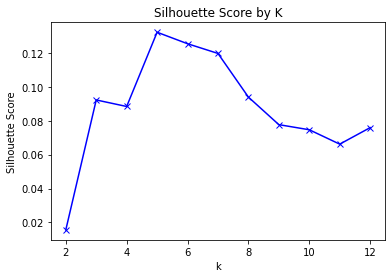

In [159]:
# Plotting the scores
plt.plot(my_range, si_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by K')
plt.show()

In [176]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_data)

KMeans(n_clusters=5)

In [177]:
print(kmeans.cluster_centers_)

[[-2.68601208e-01 -4.58183302e-01  6.28879243e-01  6.90993831e-01
  -1.16872752e+00  8.15344557e-01  1.39943866e+00  1.02671120e+00
   1.28634420e+00 -4.25331204e-01  4.31136486e-02  1.04086793e+00
   3.80122531e-01 -3.11010752e-01 -4.66755612e-02 -1.64043517e-01
  -9.81116425e-02  6.66919850e-01  7.82367318e-02  5.11171908e-01
   2.65791876e-01 -1.39331684e-01 -1.11233577e-01 -9.47629794e-02
  -1.08555732e-01 -9.37627972e-02 -9.84089554e-02 -8.95776331e-02
  -6.16369703e-02 -7.68295450e-02 -1.11715469e-01 -1.11519760e-01
  -1.03978731e-01 -1.02259681e-01 -7.70774914e-02 -9.41922754e-02
  -9.84575118e-02 -9.55784337e-02 -7.00725081e-02 -7.19374341e-02
  -9.12499596e-02 -8.31115324e-02 -6.37576713e-02 -3.96525793e-02
  -5.30063598e-01]
 [ 1.30126922e+00  1.56370771e+00  1.35938300e+00  8.70720743e-01
  -1.81924016e+00  1.41752648e+00  1.75491582e+00  1.38377978e+00
   1.73440552e+00  2.83466160e-01 -1.78501650e-01  1.07561738e+00
   1.82848945e-01 -9.05543587e-02  2.42107821e+00  2.5586

In [178]:
print(kmeans.labels_)

[1 1 4 3 4 4 1 4 3 3 2 3 2 0 3 3 2 3 3 3 3 2 0 3 0 2 0 3 2 3 2 3 3 3 3 0 3
 3 3 3 2 3 3 3 3 0 0 3 3 3 3 3 2 2 0 0 0 2 2 2 2 0 3 3 3 3 3 2 0 3 3 3 0 3
 3 0 2 3 3 3 2 3 3 3 2 0 3 2 2 0 3 3 3 3 2 2 2 3 2 0 3 0 2 3 0 3 3 3 3 3 0
 0 3 0 0 0 0 3 3 3 3 3 3 0 3 3 3 2 2 2 2 0 3 3 3 2 3 2 2 3 0 0 0 2 2 3 3 3
 3 3 2 3 2 3 2 2 3 3 3 2 0 2 0 3 0 3 2 0 3 0 0 0 2 2 2 3 3 3 3 2 0 0 0 3 3
 3 3 3 2 3 3 3 0 3 3 3 3 3 0 0 0 3 0 3 2 3 2 2 3 3 3 2 3 3 0 0 2 2 3 2 2 2
 0 0 2 2 3 2 3 2 3 3 3 2 3 3 2 3 2 0 3 3 2 3 3 3 3 0 0 0 3 2 2 3 3 3 2 3 2
 2 0 2 0 3 0 2 0 0 0 0 3 3 3 0 3 3 3 2 2 3 3 3 0 3 2 2 0 0 3 2 3 2 0 3 3 3
 3 2 3 0 2 2 2 0 3 3 2 3 3 3 3 3 3 2 0 3 3 0 3 2 0 3 0 0 3 3 3 3 2 0 2 2 0
 3 3 3 0 3 3 3 3 3 3 2 3 3 3 3 0 2 3 3 3 3 0 2 3 2 3 3 0 3 3 3 0 0 0 2 3 2
 2 3 3 2 3 2 2 3 0 3 3 0 0 3 0 2 3 3 3 3 3 3 3 3 3 2 2 3 2 0 3 3 3 2 3 3 0
 3 3 3 0 2 0 3 3 2 2 3 2 3 3 3 3 3 2 3 2 2 3 3 3 3 2 0 3 3 2 2 3 3 3 3 2 3
 3 3 3 3 0 0 3 3 3 3 2 0 0 2 0 3 0 3 3 0 3 2 3 3 2 3 3 2 0 0 3 2 0 3 3 2 3
 2 3 0 3 0 0 0 3 3 0 3 2 

In [179]:
df_merged_left_copy['LABELS'] = kmeans.labels_

# Analyze labels
clusters = pd.DataFrame(columns = (df_merged_left_copy.iloc[:,5:52].columns))
for i in range(0,5):
    a = df_merged_left_copy[df_merged_left_copy['LABELS']==i].mean()
    clusters = clusters.append(a, ignore_index=True)
    
# Show relevant information
cluster_comparison = clusters[['LABELS','MP','PER','TS%','3PAr','TRB%','OWS','DWS','WS/48',
                              'BPM','Dist.','2P','0-3',' 3-10',' 10-16','16-3P','3P']]

In [180]:
cluster_comparison

,LABELS,MP,PER,TS%,3PAr,TRB%,OWS,DWS,WS/48,BPM,Dist.,2P,0-3,3-10,10-16,16-3P,3P
0,0.0,560.706349,16.350794,0.605405,0.148357,16.184921,0.855556,0.737302,0.127111,-0.680159,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
1,1.0,1983.000000,20.500000,0.622000,0.012333,18.300000,4.533333,3.166667,0.188333,2.866667,4.266667,0.987667,NaN,NaN,0.081667,0.02000,0.012333
2,2.0,1724.244048,16.977381,0.577452,0.404815,9.579762,2.535119,1.800595,0.120149,1.389286,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000
3,3.0,574.491071,9.260714,0.499036,0.481586,8.060714,0.115476,0.463393,0.029813,-3.609524,0.004464,0.002976,0.002976,0.0,0.000000,0.00000,0.000000
4,4.0,795.000000,13.650000,0.541250,0.406000,7.450000,0.800000,0.575000,0.059250,-1.300000,15.400000,0.594000,NaN,NaN,0.152750,0.08675,0.406000


## Clustering Using MinMaxScaler

In [181]:
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [182]:
kmeans.labels_[:5]

array([1, 1, 4, 3, 4], dtype=int32)

### Pipeline for Preprocessing

In [212]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=3, random_state=42))
    ]
)

### Pipeline for clustering

In [213]:
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters = 5,
                init = "k-means++",
                n_init = 50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

### K-means clustering pipeline

In [214]:
pipe = Pipeline(
    [
        ("preprocessor",preprocessor),
        ("clusterer",clusterer),
    ]
)

In [215]:
data = df_merged_left_copy.iloc[:,5:52]

In [216]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=3, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [217]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.44423902236086205

In [218]:
adjusted_rand_score(kmeans.labels_,predicted_labels)

0.5891193300591319

/Users/macuser/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


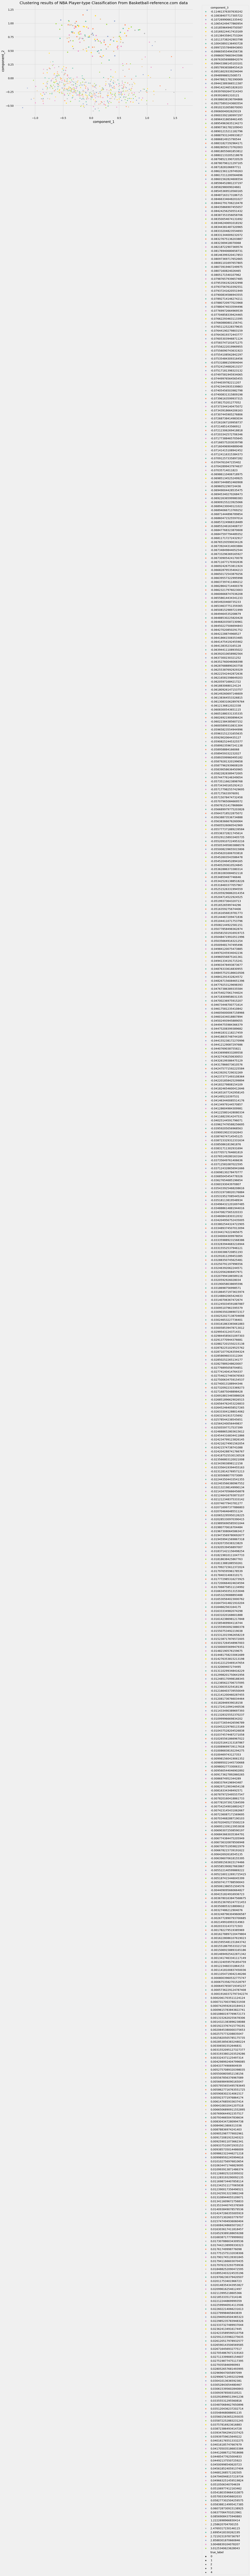

In [219]:
# Plotting the clusters

pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns = ["component_1","component_2","component_3"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = kmeans.labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    "component_3",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results of NBA Player-type Classification From Basketball-reference.com data"
)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.0)

plt.show()

## Parameter Tuning

In [200]:
# Evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)
    
    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    
    ari = adjusted_rand_score(
        kmeans.labels_,
        pipe["clusterer"]["kmeans"].labels_,
    )
    
    #add metrics to list
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

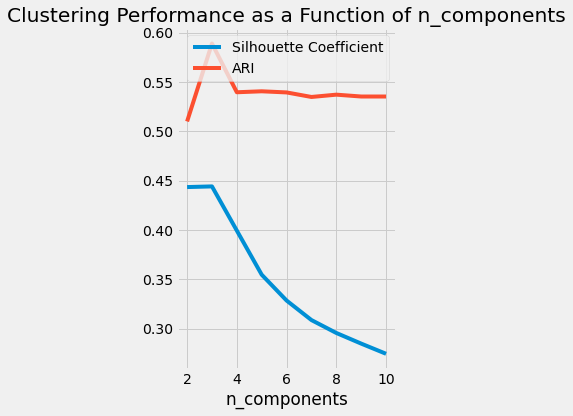

In [202]:
# Plotting evaluation metrics
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))

plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)

plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()